In [4]:
from src.saving_plan import (
    SavingPlan,
    get_saving_plans,
    get_time_periods,
    simulate,
    write_simulation_result,
)
from src.visualize import plot_total_worth
import datetime
import numpy as np
import polars as pl
import plotly.express as px
from collections import namedtuple
import plotly.graph_objects as go
from datetime import date

import plotly.io as pio

template = "plotly_dark"

pio.templates.default = template

custom_template = {
    # "layout": {"colorway": colors},
    "layout": {"bargap": 0},
    "data": {
        "histogram": [{"marker": {"line": {"color": "#252525", "width": 1}}}],
        "bar": [{"marker": {"line": {"color": "#252525", "width": 1}}}],
    },
}

pio.templates[template].update(custom_template);


In [5]:
# Read the MSCI World historical data
df = pl.read_parquet("data/msci_world_index.parquet").lazy()

Let`s check the full available time range. We can se what would had happened if we had started the saving plan back to 1972, wiht 10$ per month.

In [67]:
fig = plot_total_worth(
    df=df,
    invest_amount=10,
    period=(date(1972,1,1), date(2024,8,31)),
    title="Saving plan with 10$"
)
fig.show()

# Checking multiple periods

In [6]:
period1 = (date(1972,1,1), date(2024,8,31))
period2 = (date(1980,5,1), date(1985,5,31))
period3 = (date(1990,3,1), date(2005,3,31))
period4 = (date(2000,10,1), date(2015,10,30))
period5 = (date(2010,1,1), date(2024,8,31))

## Period 1

In [7]:
fig = plot_total_worth(
    df=df,
    invest_amount=10,
    period=(date(1972,1,1), date(2024,8,31)),
    title="Saving plan with 10$"
)
fig.show()

In [8]:
fig.write_image("assets/saving_plan_period_1.png")

## Period 2 

In [9]:
fig = plot_total_worth(
    df=df,
    invest_amount=10,
    period=period2,
    title="Saving plan with 10$"
)
fig.show()

In [10]:
fig.write_image("assets/saving_plan_period_2.png")

## Period 3

In [11]:
fig = plot_total_worth(
    df=df,
    invest_amount=10,
    period=period3,
    title="Saving plan with 10$"
)
fig.show()

In [12]:
fig.write_image("assets/saving_plan_period_3.png")

## Period 4

In [13]:
fig = plot_total_worth(
    df=df,
    invest_amount=10,
    period=period4,
    title="Saving plan with 10$"
)
fig.show()

In [14]:
fig.write_image("assets/saving_plan_period_4.png")

## Period 5

In [15]:
fig = plot_total_worth(
    df=df,
    invest_amount=10,
    period=period5,
    title="Saving plan with 10$"
)
fig.show()

In [16]:
fig.write_image("assets/saving_plan_period_5.png")

# Check multiple results with the same end date

Check whether day are the same for different periods.

In [17]:
starts = [date(1983,8,1), date(1989,5,1), date(1991,3,1), date(2003,10,1), date(2008,1,1), date(2020,11,1)]
end = (date(2024,8,31))


for start in starts:
    fig = plot_total_worth(
        df=df,
        invest_amount=10,
        period=(start, end),
        title="Saving plan with 10$"
    )
    fig.show()
    fig.write_image(f"assets/same_end_with_{start}.png")


All results seem to be the same.

# Evaluating all possible scenarios with one fix end date

In [19]:
from tqdm import tqdm

end = date(2024, 8, 31)

starts = []

for y in range(1972, 2024):
    for m in range(1, 13):
        starts.append(date(y, m, 1))


def plot_all_with_same_end(starts):
    """Plot all saving plans with the same end date but different start dates"""

    fig = go.Figure()

    # iterate over all possible start dates
    for start in tqdm(starts):
        data = []
        for day in range(1, 32):

            saving_plan = SavingPlan(
                df=df, invest_amount=10, day_to_invest=day, period=(start, end)
            )
            data.append(saving_plan.total_worth)

        data = np.array(data)
        data = data / np.max(data)

        fig.add_trace(
            go.Scatter(
                x=list(range(1, 32)),
                y=data,
                mode="lines",
                name="Mean",
                line_color="gray",
                opacity=0.3,
            )
        )

        fig.update_xaxes(tickvals=list(range(1, 32)), title="Day of the month")
        fig.update_yaxes(title="Normalized total worth")
        fig.update_layout(
            title=f"Saving plan starting with all possible starts<br>but with the same end",
            height=500,
            width=1000,
            showlegend=False,
        )

        data = []

    return fig

In [20]:
fig = plot_all_with_same_end(starts)

100%|██████████| 624/624 [00:34<00:00, 17.92it/s]


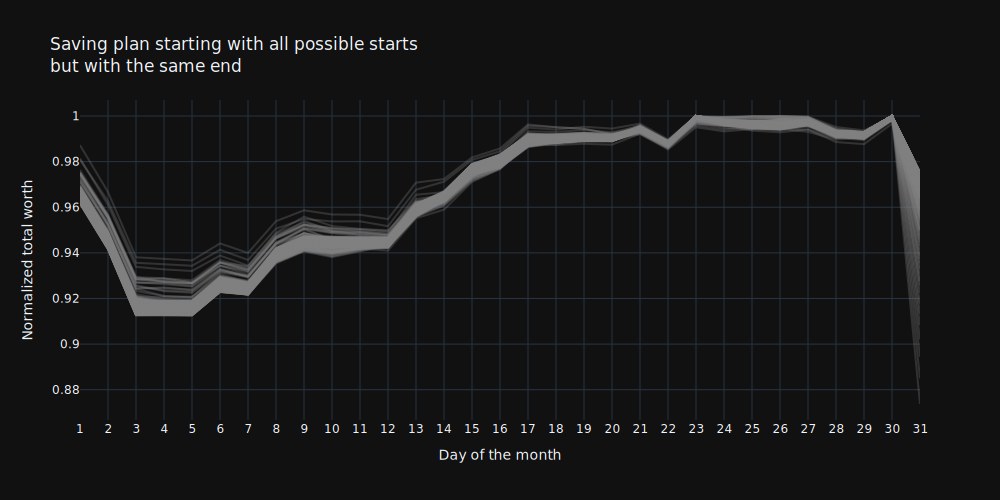

In [21]:
fig.update_layout(width=1000, height=500).show(renderer="svg")

In [50]:
fig.write_image("assets/saving_plan_same_end_all.png")

# Compare two different saving plans with the same time period


Using the best day and the worst day

In [22]:
saving_plan_a = SavingPlan(
    df=df, invest_amount=10, day_to_invest=5, period=(date(1972,1,1), date(2024,8,31)
    )
)

saving_plan_b = SavingPlan(
    df=df, invest_amount=10, day_to_invest=30, period=(date(1972,1,1), date(2024,8,31)
    )
)

In [23]:
fig = go.Figure()

fig.add_trace(
    go.Scatter(
        x=saving_plan_a.result_df.collect()["Date"].dt.date(),
        y=saving_plan_a.result_df.collect()["total_worth"],
        mode="lines+markers",
        name="Day 5",
    )
)

fig.add_trace(
    go.Scatter(
        x=saving_plan_b.result_df.collect()["Date"].dt.date(),
        y=saving_plan_b.result_df.collect()["total_worth"],
        mode="lines+markers",
        name="Day 30",
    )
)

fig.update_layout(
    title="Saving plan with 10💵<br>Day 5 vs Day 30", 
    height=500,
    width=1000,
    xaxis_title="Date", 
    yaxis_title="Total worth")

# set the x and y range
fig


fig.write_image("assets/saving_plan_day_5_vs_30.png")
(fig
 .update_xaxes(range=["2019-05-01", "2023-05-01"])
 .update_yaxes(range=[30000, 60000])
 .write_image("assets/saving_plan_day_5_vs_30_zoomed.png"))

In [24]:
fig

The difference the two days is rather small.

In [25]:
diff = saving_plan_a.result_df.collect()["total_worth"] - saving_plan_b.result_df.collect()["total_worth"]

diff_pct = diff / saving_plan_b.result_df.collect()["total_worth"] * 100

PLotting the distribution of the differences between day 5 and day 30

In [26]:
fig = go.Figure()

fig.add_trace(
    go.Histogram(
        x=diff_pct,
        histnorm="percent",
        nbinsx=50,
    ))

fig.update_layout(
    title="Difference between day 5 and day 30",
    xaxis_title="Difference",
    yaxis_title="percent",
    height=500,
    width=1000
)

# median = np.median(diff_pct)
# fig.add_vline(x=median, line_dash="dash", line_color="red", annotation_text=f"Median: {median:.2f}%")

mean = np.mean(diff_pct.to_numpy())
fig.add_vline(x=mean, line_dash="dash", line_color="yellow", annotation_text=f"Mean: {mean:.2f}%")

fig.write_image("assets/saving_plan_day_5_vs_30_diff_dist.png")

# Differences between cheapest and most expensive day to invest

In [27]:
agg_df = (
    df
    .group_by(
        pl.col("Date").dt.year().alias("year"),
        pl.col("Date").dt.month().alias("month")
    ).agg(
        pl.min("Close").alias("min_close"),
        pl.max("Close").alias("max_close"),
    ).with_columns(
        ((pl.col("max_close") - pl.col("min_close")) / pl.col("min_close") * 100).alias("diff_pct")
    )
)

In [28]:
diff_pct = agg_df.collect()["diff_pct"]

In [29]:
fig = go.Figure()

fig.add_trace(
    go.Histogram(
        x=diff_pct,
        histnorm="percent",
        nbinsx=50,
    )
)

fig.update_layout(
    title="Monthly differences",
    xaxis_title="Difference %",
    yaxis_title="percent",
    height=500,
    width=1000,
)

# add median
median = np.median(diff_pct)

fig.add_vline(
    x=median,
    line_dash="dash",
    line_color="red",
    annotation_text=f"Median: {median:.2f}%",
    annotation_position="right",
)

# q1
q1 = np.percentile(diff_pct, 25)
fig.add_vline(
    x=q1, line_dash="dash", line_color="yellow", annotation_text=f"Q1: {q1:.2f}%", annotation_position="top left"
)

# q3
q3 = np.percentile(diff_pct, 75)
fig.add_vline(
    x=q3,
    line_dash="dash",
    line_color="yellow",
    annotation_text=f"Q3: {q3:.2f}%",
    annotation_position="top right",
)

fig.write_image("assets/monthly_diff_dist.png")

In [30]:
fig.show()

# Day rankings

Create dataframe with all possible starting dates

In [31]:
result_dataframes = []

for i in range(1, 32):
    saving_plan = SavingPlan(df, 10, i, (datetime.date(1971, 12, 31), datetime.date(2020, 3, 31)))
    result_dataframes.append(saving_plan.result_df)

result_df = pl.concat(result_dataframes).sort("Date", "day_to_invest")

In [32]:
result_df.head().collect(
)

Open,High,Low,Close,Volume,Dividends,Stock Splits,Date,bought_stocks,all_stocks,total_worth,day_to_invest,pct_chg,abs_pct_chg
f64,f64,f64,f64,i64,f64,f64,datetime[ns],f64,f64,f64,i32,f64,f64
104.300003,104.300003,104.300003,104.300003,0,0.0,0.0,1972-01-03 00:00:00,0.095877,0.095877,10.0,1,null,null
104.300003,104.300003,104.300003,104.300003,0,0.0,0.0,1972-01-03 00:00:00,0.095877,0.095877,10.0,2,null,null
104.300003,104.300003,104.300003,104.300003,0,0.0,0.0,1972-01-03 00:00:00,0.095877,0.095877,10.0,3,null,null
104.599998,104.599998,104.599998,104.599998,0,0.0,0.0,1972-01-04 00:00:00,0.095602,0.095602,10.0,4,null,null
105.599998,105.599998,105.599998,105.599998,0,0.0,0.0,1972-01-05 00:00:00,0.094697,0.094697,10.0,5,null,null


## Creating rank dataframe

In [33]:
pl.Config.set_tbl_rows(60)

w = (pl.col("Date").dt.year().alias("year"), pl.col("Date").dt.month().alias("month"))

rank_df = result_df.with_columns(rank=pl.col("Close").rank(method="dense").over(w)).sort(["Date", "day_to_invest"]) #  .collect()

In [34]:
rank_df.head().collect()

Open,High,Low,Close,Volume,Dividends,Stock Splits,Date,bought_stocks,all_stocks,total_worth,day_to_invest,pct_chg,abs_pct_chg,rank
f64,f64,f64,f64,i64,f64,f64,datetime[ns],f64,f64,f64,i32,f64,f64,u32
104.300003,104.300003,104.300003,104.300003,0,0.0,0.0,1972-01-03 00:00:00,0.095877,0.095877,10.0,1,null,null,1
104.300003,104.300003,104.300003,104.300003,0,0.0,0.0,1972-01-03 00:00:00,0.095877,0.095877,10.0,2,null,null,1
104.300003,104.300003,104.300003,104.300003,0,0.0,0.0,1972-01-03 00:00:00,0.095877,0.095877,10.0,3,null,null,1
104.599998,104.599998,104.599998,104.599998,0,0.0,0.0,1972-01-04 00:00:00,0.095602,0.095602,10.0,4,null,null,2
105.599998,105.599998,105.599998,105.599998,0,0.0,0.0,1972-01-05 00:00:00,0.094697,0.094697,10.0,5,null,null,3


I go with the dense ranking method, which assigns the same rank to the same values, but the next value will have a rank that is the next number after the previous rank. 

In [35]:


agg_df = rank_df.group_by(pl.col("day_to_invest")).agg(
    # pl.quantile("rank", 0.5).alias("total_rank"),
    pl.mean("rank").alias("total_rank"), 
).sort("day_to_invest").collect()

fig = px.line(agg_df, x="day_to_invest", y="total_rank", markers=True)

# tickvals for all days
fig.update_xaxes(tickvals=list(range(1, 32)))

## Get distribution of the ranks for the first day

using the sum of the ranks, the best day was the first day. To get better insight, we can get the distribution of the first day.


In [37]:
day_1_rank_dist = (
    rank_df
    .filter(pl.col("day_to_invest") == 1)
    .group_by(pl.col("rank"))
    .len()
    ).collect()


# day_1_rank_dist
x, y = day_1_rank_dist["rank"].to_list(), day_1_rank_dist["len"].to_list()
px.bar(x=x, y=y)

## Get distribution of the ranks for the second day

In [38]:
day_2_rank_dist = (
    rank_df
    .filter(pl.col("day_to_invest") == 2)
    .group_by(pl.col("rank"))
    .len()#
    ).collect()


# day_2_rank_dist
x, y = day_2_rank_dist["rank"].to_list(), day_2_rank_dist["len"].to_list()
px.bar(x=x, y=y)

## Get distribution of ranks for 31th day

In [39]:
day_31_rank_dist = (
    rank_df
    .filter(pl.col("day_to_invest") == 31)
    .group_by(pl.col("rank"))
    .agg(
        pl.len().alias("len"),
    ).with_columns(pct=pl.col("len") / pl.sum("len")
    ).collect())#

# day_31_rank_dist
px.bar(day_31_rank_dist, x="rank", y="pct",)

# Get distribution of the rank for the 15th day

In [40]:
day_15_rank_dist = (
    rank_df
    .filter(pl.col("day_to_invest") == 15)
    .group_by(pl.col("rank"))
    .agg(
        pl.len().alias("len"),
    ).with_columns(pct=pl.col("len") / pl.sum("len")
    ).collect())


# day_15_rank_dist
px.bar(day_15_rank_dist, x="rank", y="pct",)

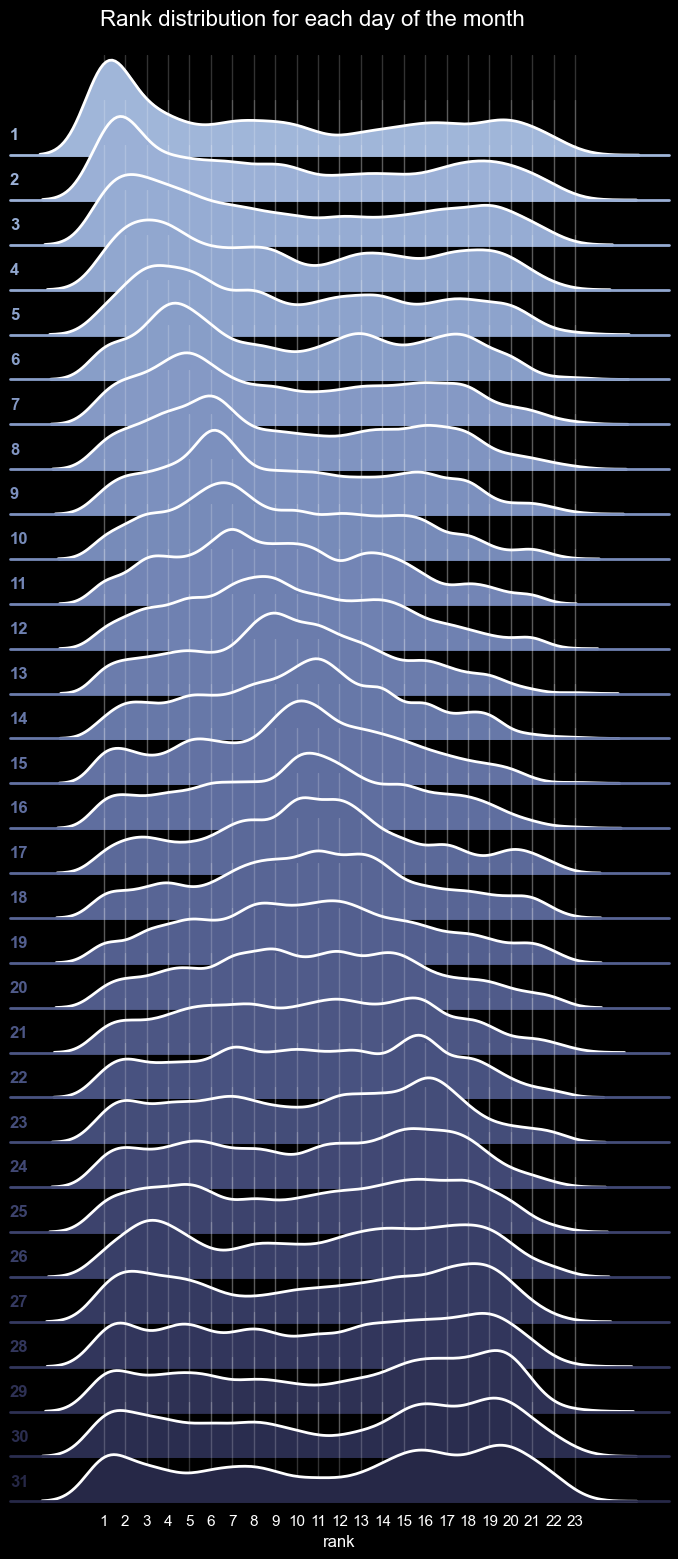

In [41]:
# creating Overlapping densities (‘ridge plot’) from day 1 to day 31 with seaborn
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("dark_background")
# sns.set_theme(style="dark", rc={"axes.facecolor": (0, 0, 0, 0)})
# Set the theme with a dark background
sns.set_theme(style="dark", rc={
    "axes.facecolor": (0, 0, 0, 0),  # Black background for axes
    "figure.facecolor": (0, 0, 0, 1),  # Black background for figure
    "axes.labelcolor": "white",  # White labels
    "xtick.color": "white",  # White x-tick labels
    "ytick.color": "white",  # White y-tick labels
    "text.color": "white",  # White text
    "grid.color": "white",  # White grid
    "axes.grid": True,
    "grid.alpha": 0.2,
})


# Initialize the FacetGrid object
pal = sns.cubehelix_palette(31, rot=-.1, light=.7, dark=.17)
# pal = sns.color_palette("cividis", 10)
g = sns.FacetGrid(rank_df.collect().to_pandas(), row="day_to_invest", hue="day_to_invest", aspect=15, height=.5, palette=pal)

# Draw the densities in a few steps
g.map(sns.kdeplot, "rank",
      bw_adjust=.5, clip_on=False,
      fill=True, alpha=1, linewidth=1.5)

g.map(sns.kdeplot, "rank", clip_on=False, color="w", lw=2, bw_adjust=.5)

# passing color=None to refline() uses the hue mapping
g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)


# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes)


g.map(label, "rank")

# Set the subplots to overlap
g.figure.subplots_adjust(hspace=-.55)

# Remove axes details that don't play well with overlap
g.set_titles("")
g.set(yticks=[], ylabel="")
g.despine(bottom=True, left=True)

# set title for the figure
g.figure.suptitle("Rank distribution for each day of the month", fontsize=16, position=(0.5, 1.005))

# add x ticks for all ranks
g.set(xticks=list(range(1, rank_df.collect().to_pandas()["rank"].max() + 1)))


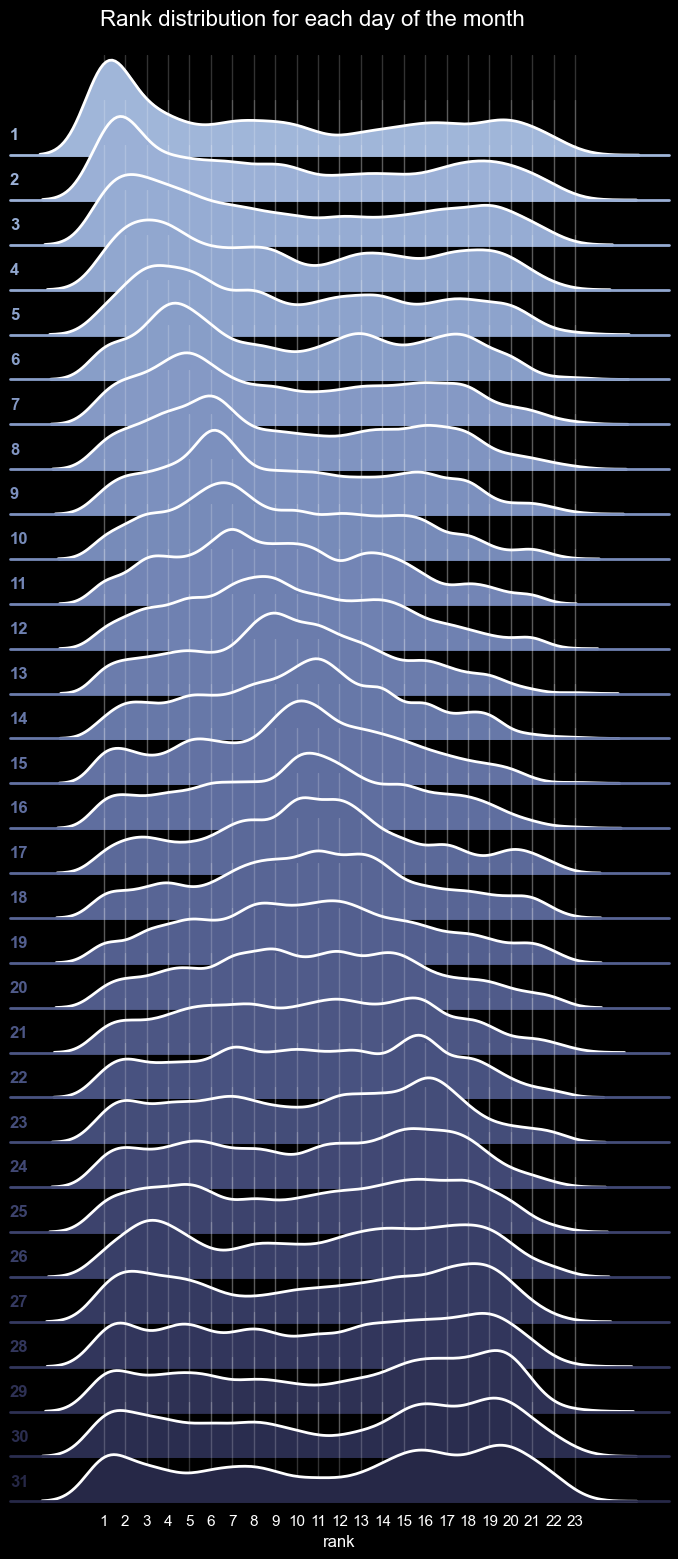

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt


def create_ridge_plot(df, column, hue, title, palette="cubehelix", text_color="white"):
    """
    Creates a ridge plot using seaborn's FacetGrid and kdeplot.

    Parameters:
    -----------
        df (pd.DataFrame): The dataframe containing the data to plot.
        column (str): The column name in the dataframe to plot.
        hue (str): The column name in the dataframe to use for color encoding.
        title (str): The title of the plot.
        palette (str or list, optional): The color palette to use. Default is "cubehelix".
        text_color (str, optional): The color of the text in the plot. Default is "white".

    Returns
    -------
        sns.FacetGrid: The FacetGrid object containing the ridge plot.
    """
    # Set the theme with a dark background
    plt.style.use("dark_background")

    sns.set_theme(
        style="dark",
        rc={
            "axes.facecolor": (0, 0, 0, 0),  # Black background for axes
            "figure.facecolor": (0, 0, 0, 1),  # Black background for figure
            "axes.labelcolor": "white",  # White labels
            "xtick.color": "white",  # White x-tick labels
            "ytick.color": "white",  # White y-tick labels
            "text.color": "white",  # White text
            "grid.color": "white",  # White grid
            "axes.grid": True,
            "grid.alpha": 0.2,
        },
    )

    # Initialize the FacetGrid object
    if palette == "cubehelix":
        pal = sns.cubehelix_palette(31, rot=-0.1, light=0.7, dark=0.17)
    else:
        pal = sns.color_palette(palette, 31)

    g = sns.FacetGrid(df, row=hue, hue=hue, aspect=15, height=0.5, palette=pal)

    # Draw the densities in a few steps
    g.map(
        sns.kdeplot,
        column,
        bw_adjust=0.5,
        clip_on=False,
        fill=True,
        alpha=1,
        linewidth=1.5,
    )

    g.map(sns.kdeplot, column, clip_on=False, color="w", lw=2, bw_adjust=0.5)

    # Passing color=None to refline() uses the hue mapping
    g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)

    # Define and use a simple function to label the plot in axes coordinates
    def label(x, color, label):
        ax = plt.gca()
        ax.text(
            0,
            0.2,
            label,
            fontweight="bold",
            color=color,
            ha="left",
            va="center",
            transform=ax.transAxes,
        )

    g.map(label, column)

    # Set the subplots to overlap
    g.figure.subplots_adjust(hspace=-0.55)

    # Remove axes details that don't play well with overlap
    g.set_titles("")
    g.set(yticks=[], ylabel="")
    g.despine(bottom=True, left=True)

    # Set title for the figure
    g.figure.suptitle(title, fontsize=16, color=text_color, position=(0.5, 1.005))

    # Add x ticks for all ranks
    g.set(xticks=list(range(1, df[column].max() + 1)))

    return g


# Example usage
g = create_ridge_plot(
    rank_df.collect().to_pandas(),
    column="rank",
    hue="day_to_invest",
    title="Rank distribution for each day of the month",
)

In [45]:
g.savefig("assets/rank_distribution_all_day.png")

## Rank statistics
Generic statistics for the ranks.

In [62]:
rank_df.select("day_to_invest", "rank").collect().to_pandas().groupby("day_to_invest")["rank"].describe()

,count,mean,std,min,25%,50%,75%,max
day_to_invest,,,,,,,,
1,579.0,9.032815,7.077717,1.0,2.0,8.0,16.0,23.0
2,579.0,9.373057,6.792197,1.0,3.0,8.0,16.0,23.0
3,579.0,9.492228,6.534009,1.0,3.5,8.0,16.0,22.0
4,579.0,9.683938,6.254017,1.0,4.0,9.0,15.0,22.0
5,579.0,9.701209,5.990377,1.0,4.0,8.0,15.0,23.0
6,579.0,9.777202,5.891208,1.0,4.0,9.0,15.0,23.0
7,579.0,9.696028,5.834289,1.0,5.0,9.0,15.0,23.0
8,579.0,9.713299,5.668221,1.0,5.0,9.0,15.0,23.0
9,579.0,9.628670,5.374740,1.0,6.0,9.0,14.0,23.0
